<a href="https://colab.research.google.com/github/alegbeleye/Salary-Prediction/blob/main/SalaryPrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_path = "/content/drive/MyDrive/data_files/archive/Salary_Data.csv"
data = pd.read_csv(csv_path)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = data[["YearsExperience"]].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y = data[["Salary"]].values
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

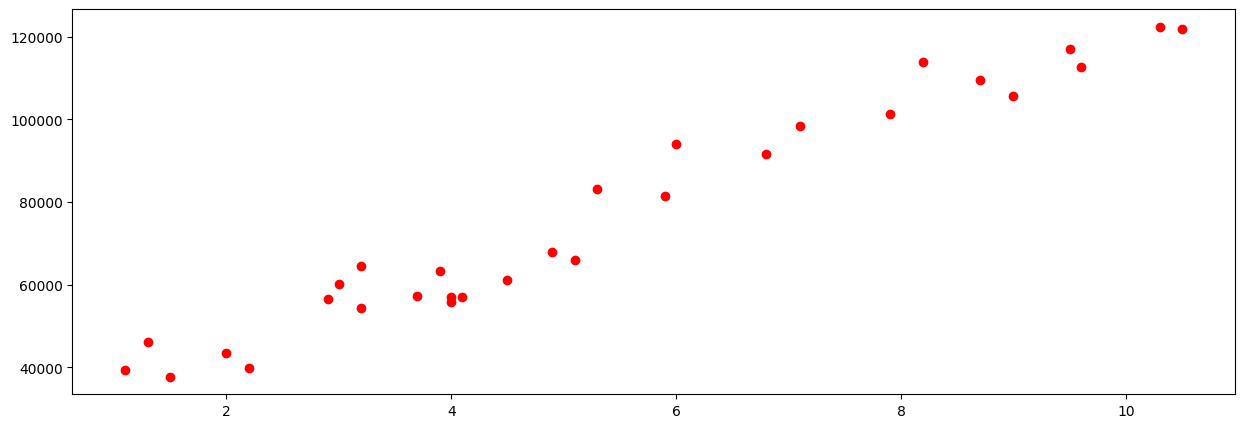

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(X, y, c="Red", label="Salary")
plt.show()

####Split data

In [7]:
# Shuffle dataset to make sure they are randomized
indices = list(range(len(X)))
np.random.shuffle(indices)
X = X[indices]
y= y[indices]

In [8]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
start_train = 0
end_train = int(TRAIN_SIZE * len(X))
start_val = end_train
end_val = int((TRAIN_SIZE+VAL_SIZE) * len(X))
test_start = end_val

In [10]:
X_train = X[start_train:end_train]
X_test = X[test_start:]
y_train = y[start_train: end_train]
y_test = y[test_start:]
X_val = X[start_val:end_val]
y_val = y[start_val:end_val]

len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val)

(21, 21, 5, 5, 4, 4)

#### Standardize Data

In [11]:
# write a function to standardize the data
def standardize_data(input, mean, std):
  return (input - mean)/std

In [12]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)


In [13]:
#standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

#### Weights

In [14]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]
INPUT_DIM, OUTPUT_DIM

(1, 1)

In [15]:
# Training
W = 0.1 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
epochs = 100
learning_rate = 1e-1
for epoch in range(epochs):
  # forward pass
  y_pred = np.dot(X_train, W) + b

  N = len(y_train)
  loss = (1/N) * np.sum((y_train - y_pred) ** 2)

  # print out loss
  if(epoch % 10 == 0):
    print(f"epoch: {epoch}, loss: {loss:.3f}")

  dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  db = -(2/N) * np.sum((y_train - y_pred) * 1)

  # Update weights and bias
  W += -learning_rate * dW
  b += -learning_rate * db


epoch: 0, loss: 0.704
epoch: 10, loss: 0.063
epoch: 20, loss: 0.056
epoch: 30, loss: 0.056
epoch: 40, loss: 0.056
epoch: 50, loss: 0.056
epoch: 60, loss: 0.056
epoch: 70, loss: 0.056
epoch: 80, loss: 0.056
epoch: 90, loss: 0.056


In [16]:
# predictions
train_preds = W*X_train + b
test_preds = W*X_test + b

In [17]:
#train and test MSE
train_mse = np.mean((y_train - train_preds) ** 2)
test_mse = np.mean((y_test - test_preds) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.06, test_MSE: 0.02


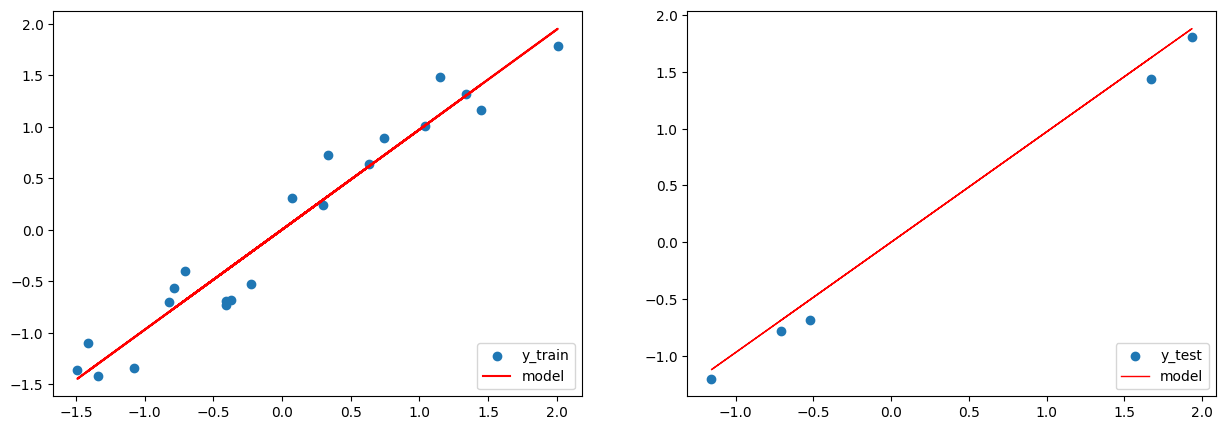

In [18]:
# figure size
plt.figure(figsize=(15, 5))

# plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, train_preds, color="red", linestyle="-", label="model")
plt.legend(loc="lower right")

#plot testing data
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, test_preds, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")


#Show plots
plt.show()
